In [6]:
# To do vectorized numerical computations on the dataset including the implementation of the algorithm
import numpy as np 
# To load dataset
from sklearn.datasets import load_boston
# To plot graphs
import matplotlib.pyplot as plt

In [7]:
dataset = load_boston()

X = dataset.data # feature samples
# dataset.target returns the target values, also called labels.
y = dataset.target[:,np.newaxis] #adding a new dimension to the data to use the data as a column vector

print("Total samples in our dataset is: {}".format(X.shape[0]))

Total samples in our dataset is: 506


In [8]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params #hypothesis function, inner product of features with parameters
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [9]:
def gradient_descent(X, y, params, learning_rate, n_iters): #n_iters, number of iterations for gradient descent
    n_samples = len(y)
    # Keep the history of our costs returned by the cost function in each iteration     
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        # As for the update rule, 1/n_samples) * X.T @ (X @ params - y) corresponds to the partial derivative of the cost 
        # function with respect to the parameters. So, params holds the updated parameter values according to the update rule.
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [10]:
n_samples = len(y)
mins = np.min(X, axis = 0)
maxs = np.max(X, axis = 0)
rng = maxs - mins
X = 1 - ((maxs - X)/rng)

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

Initial cost is:  296.0734584980237 

Optimal parameters are: 
 [[10.60909534]
 [-1.44758246]
 [ 4.57136954]
 [-1.61846213]
 [ 3.66710018]
 [-0.56002176]
 [13.19804497]
 [ 1.58872803]
 [ 2.04067742]
 [-0.33216264]
 [-2.09345813]
 [-2.68176614]
 [ 9.31977872]
 [-7.40453051]] 

Final cost is:  [18.48534728]


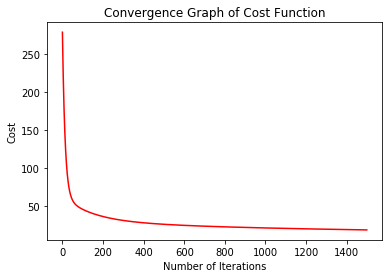

In [11]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()